# Project Team ID-PTID-CDS-JAN-25-2318
## Project 1- Customer Transaction Prediction 
## ID-PRCP-1003

#### Domain: Banking

#### Importting Necessary Libraries 

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
from datetime import datetime 
from datetime import timedelta
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
BASE_DATASET_DIR="./datasets"
BASE_MODEL_DIR='./models'
dataset = "train.cv"
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
import random
import seaborn as sns

#for Inline plots
%matplotlib inline 
#Constants
RANDOM_SEED=42
TEST_SIZE=0.2

BASE_DATASET_DIR="./datasets"
BASE_MODEL_DIR='./models'

#Control execution
PLOT_HIST=True
PLOT_CORRELATION = True

In [4]:
#LOADING THE DATA

In [6]:
df = pd.read_csv(r"C:\Users\deepi\Downloads\trainctp.csv\train.csv")
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
df.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

## Training model with basic checks

In [11]:
# check for missing values in the DataFrame
print(df.isnull().sum())

if df.isnull().sum().any():
    print("Missing data exist")
else:
    print("No missing data in dataset")

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64
No missing data in dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [15]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Target values
target
0    179902
1     20098
Name: count, dtype: int64


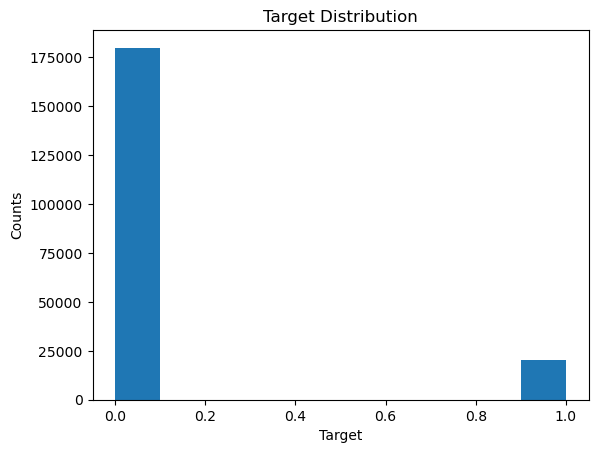

In [16]:
#Check the data distribution for the target type
plt.hist(df["target"])
plt.xlabel('Target')
plt.ylabel('Counts')
plt.title('Target Distribution')
print("Target values")
print(df["target"].value_counts())

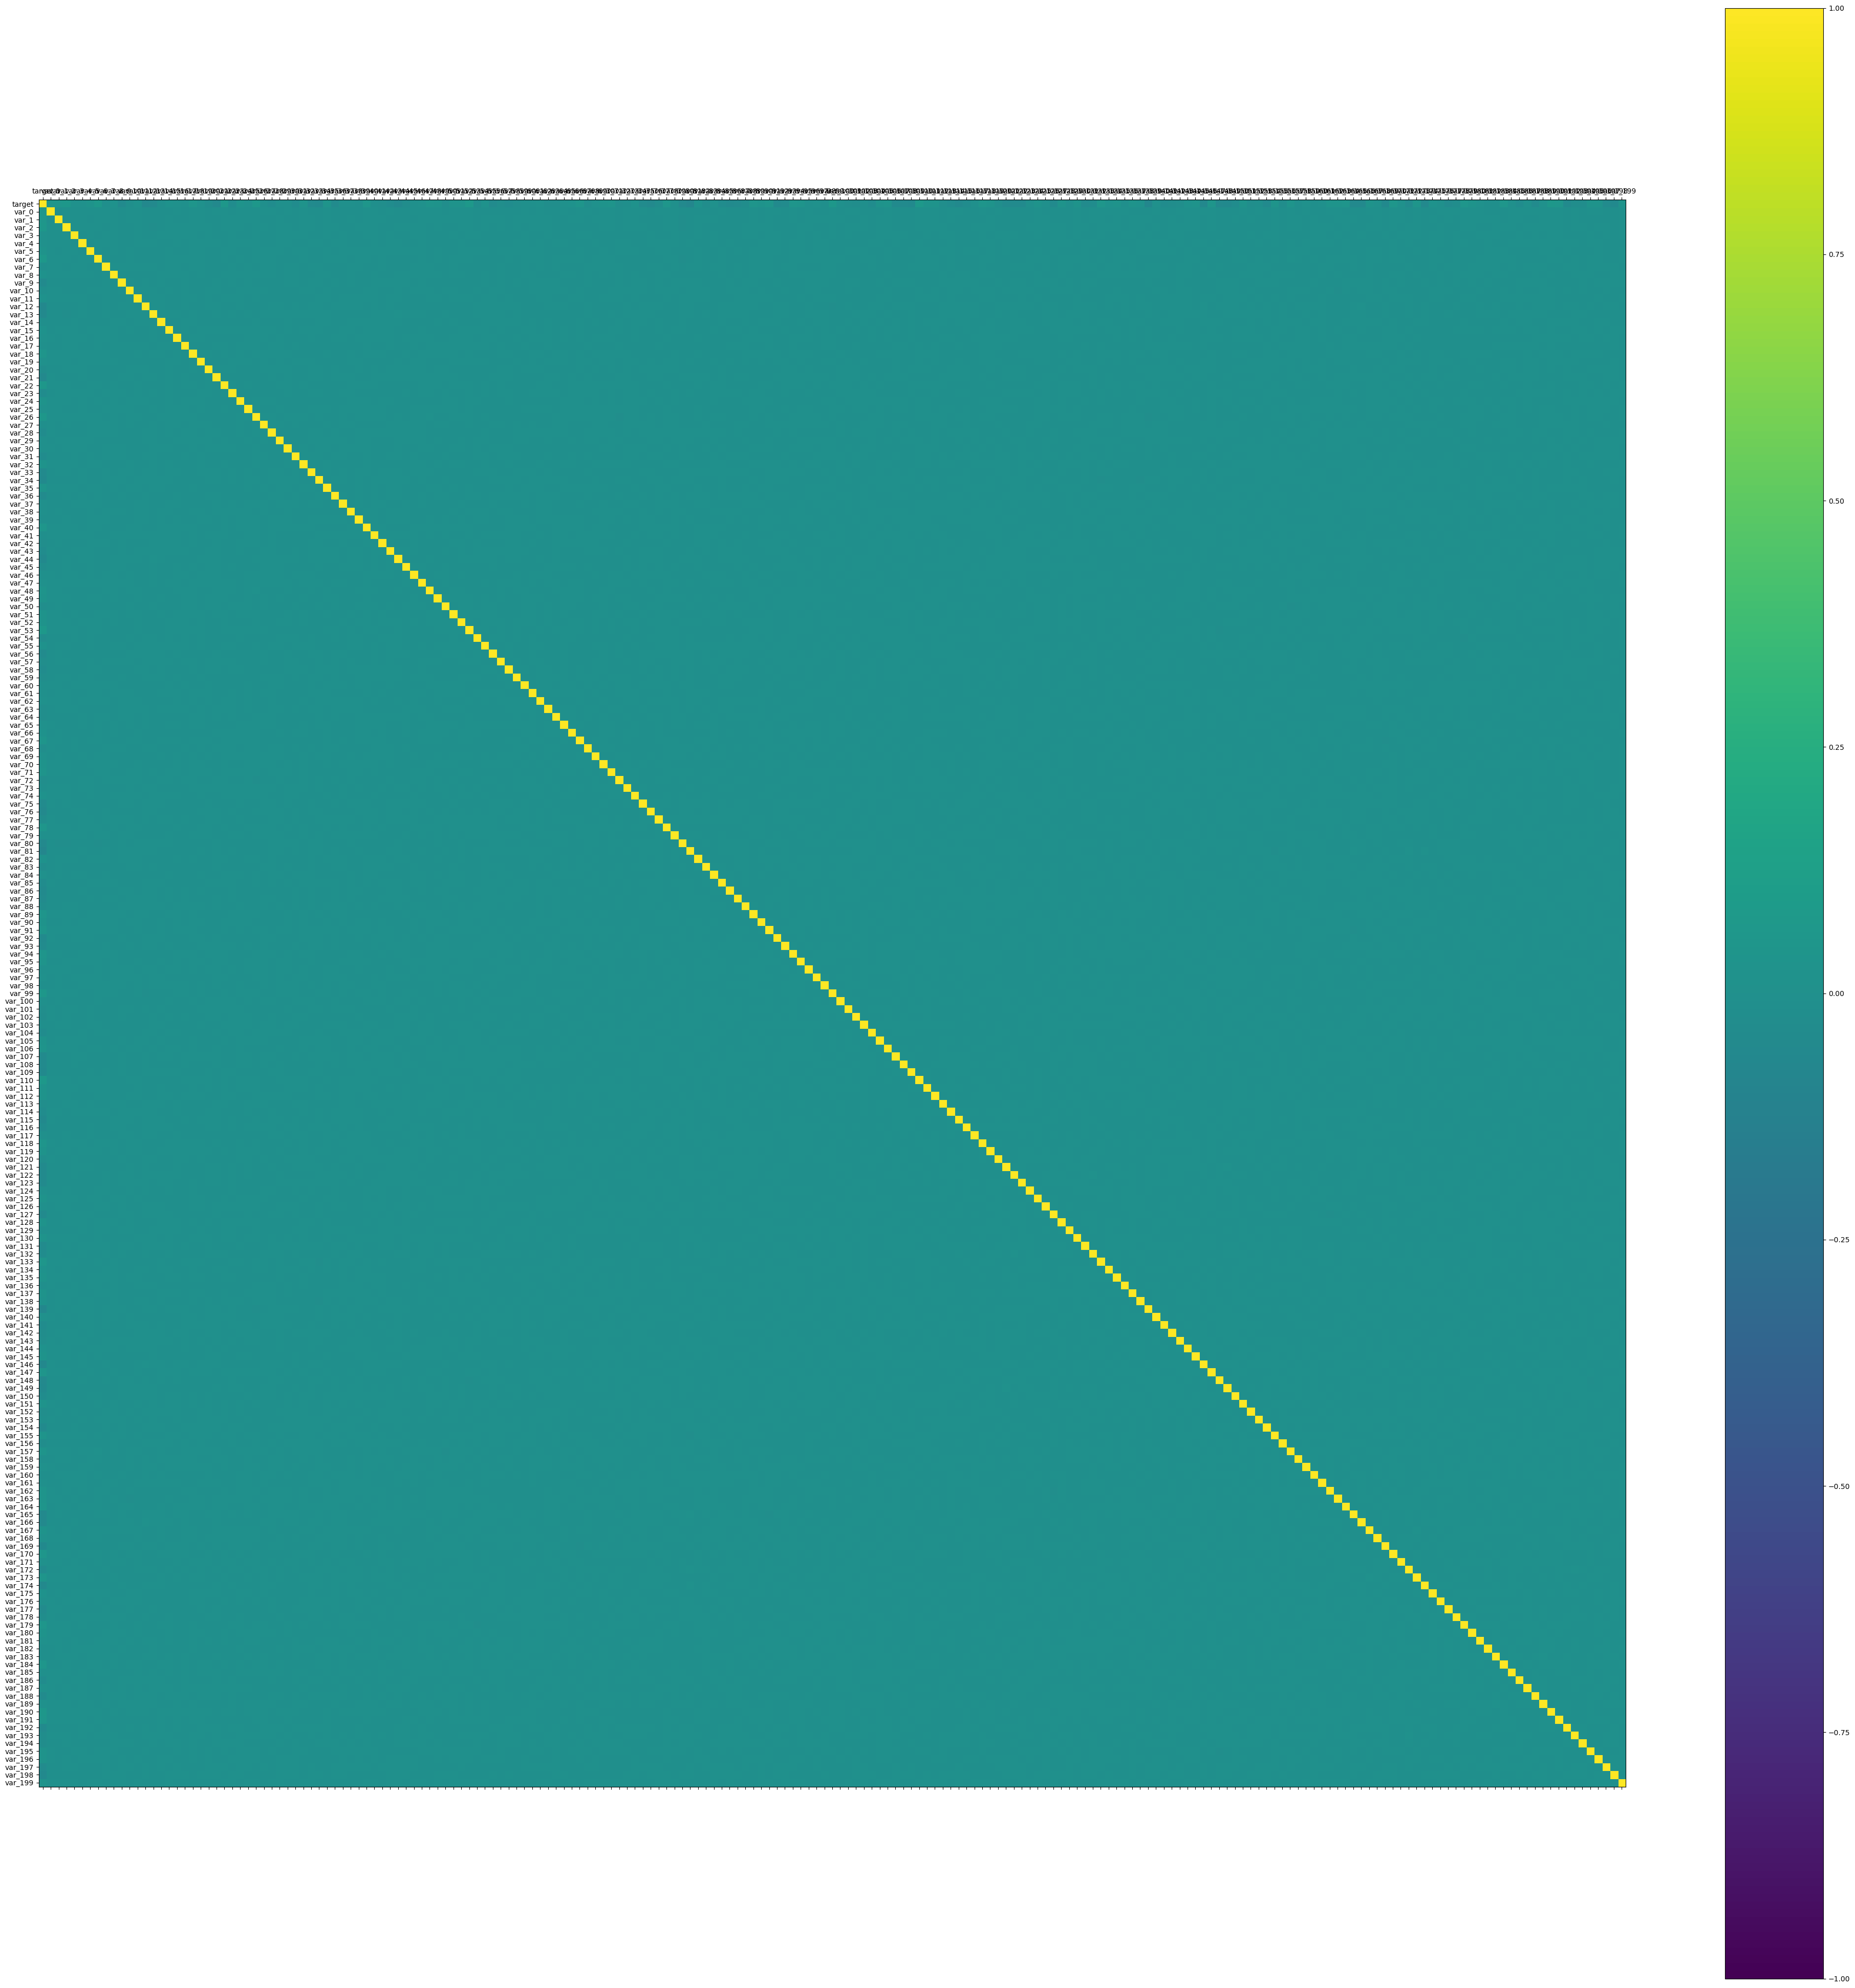

In [17]:
if PLOT_CORRELATION == True:
    # Correction Matrix Plot
    correlations = df.drop(['ID_code'], axis=1).corr()
# plot correlation matrix
    fig = plt.figure(figsize=(50,50))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(df.columns.values[1:]), 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns.values[1:])
    ax.set_yticklabels(df.columns.values[1:])
    plt.show()

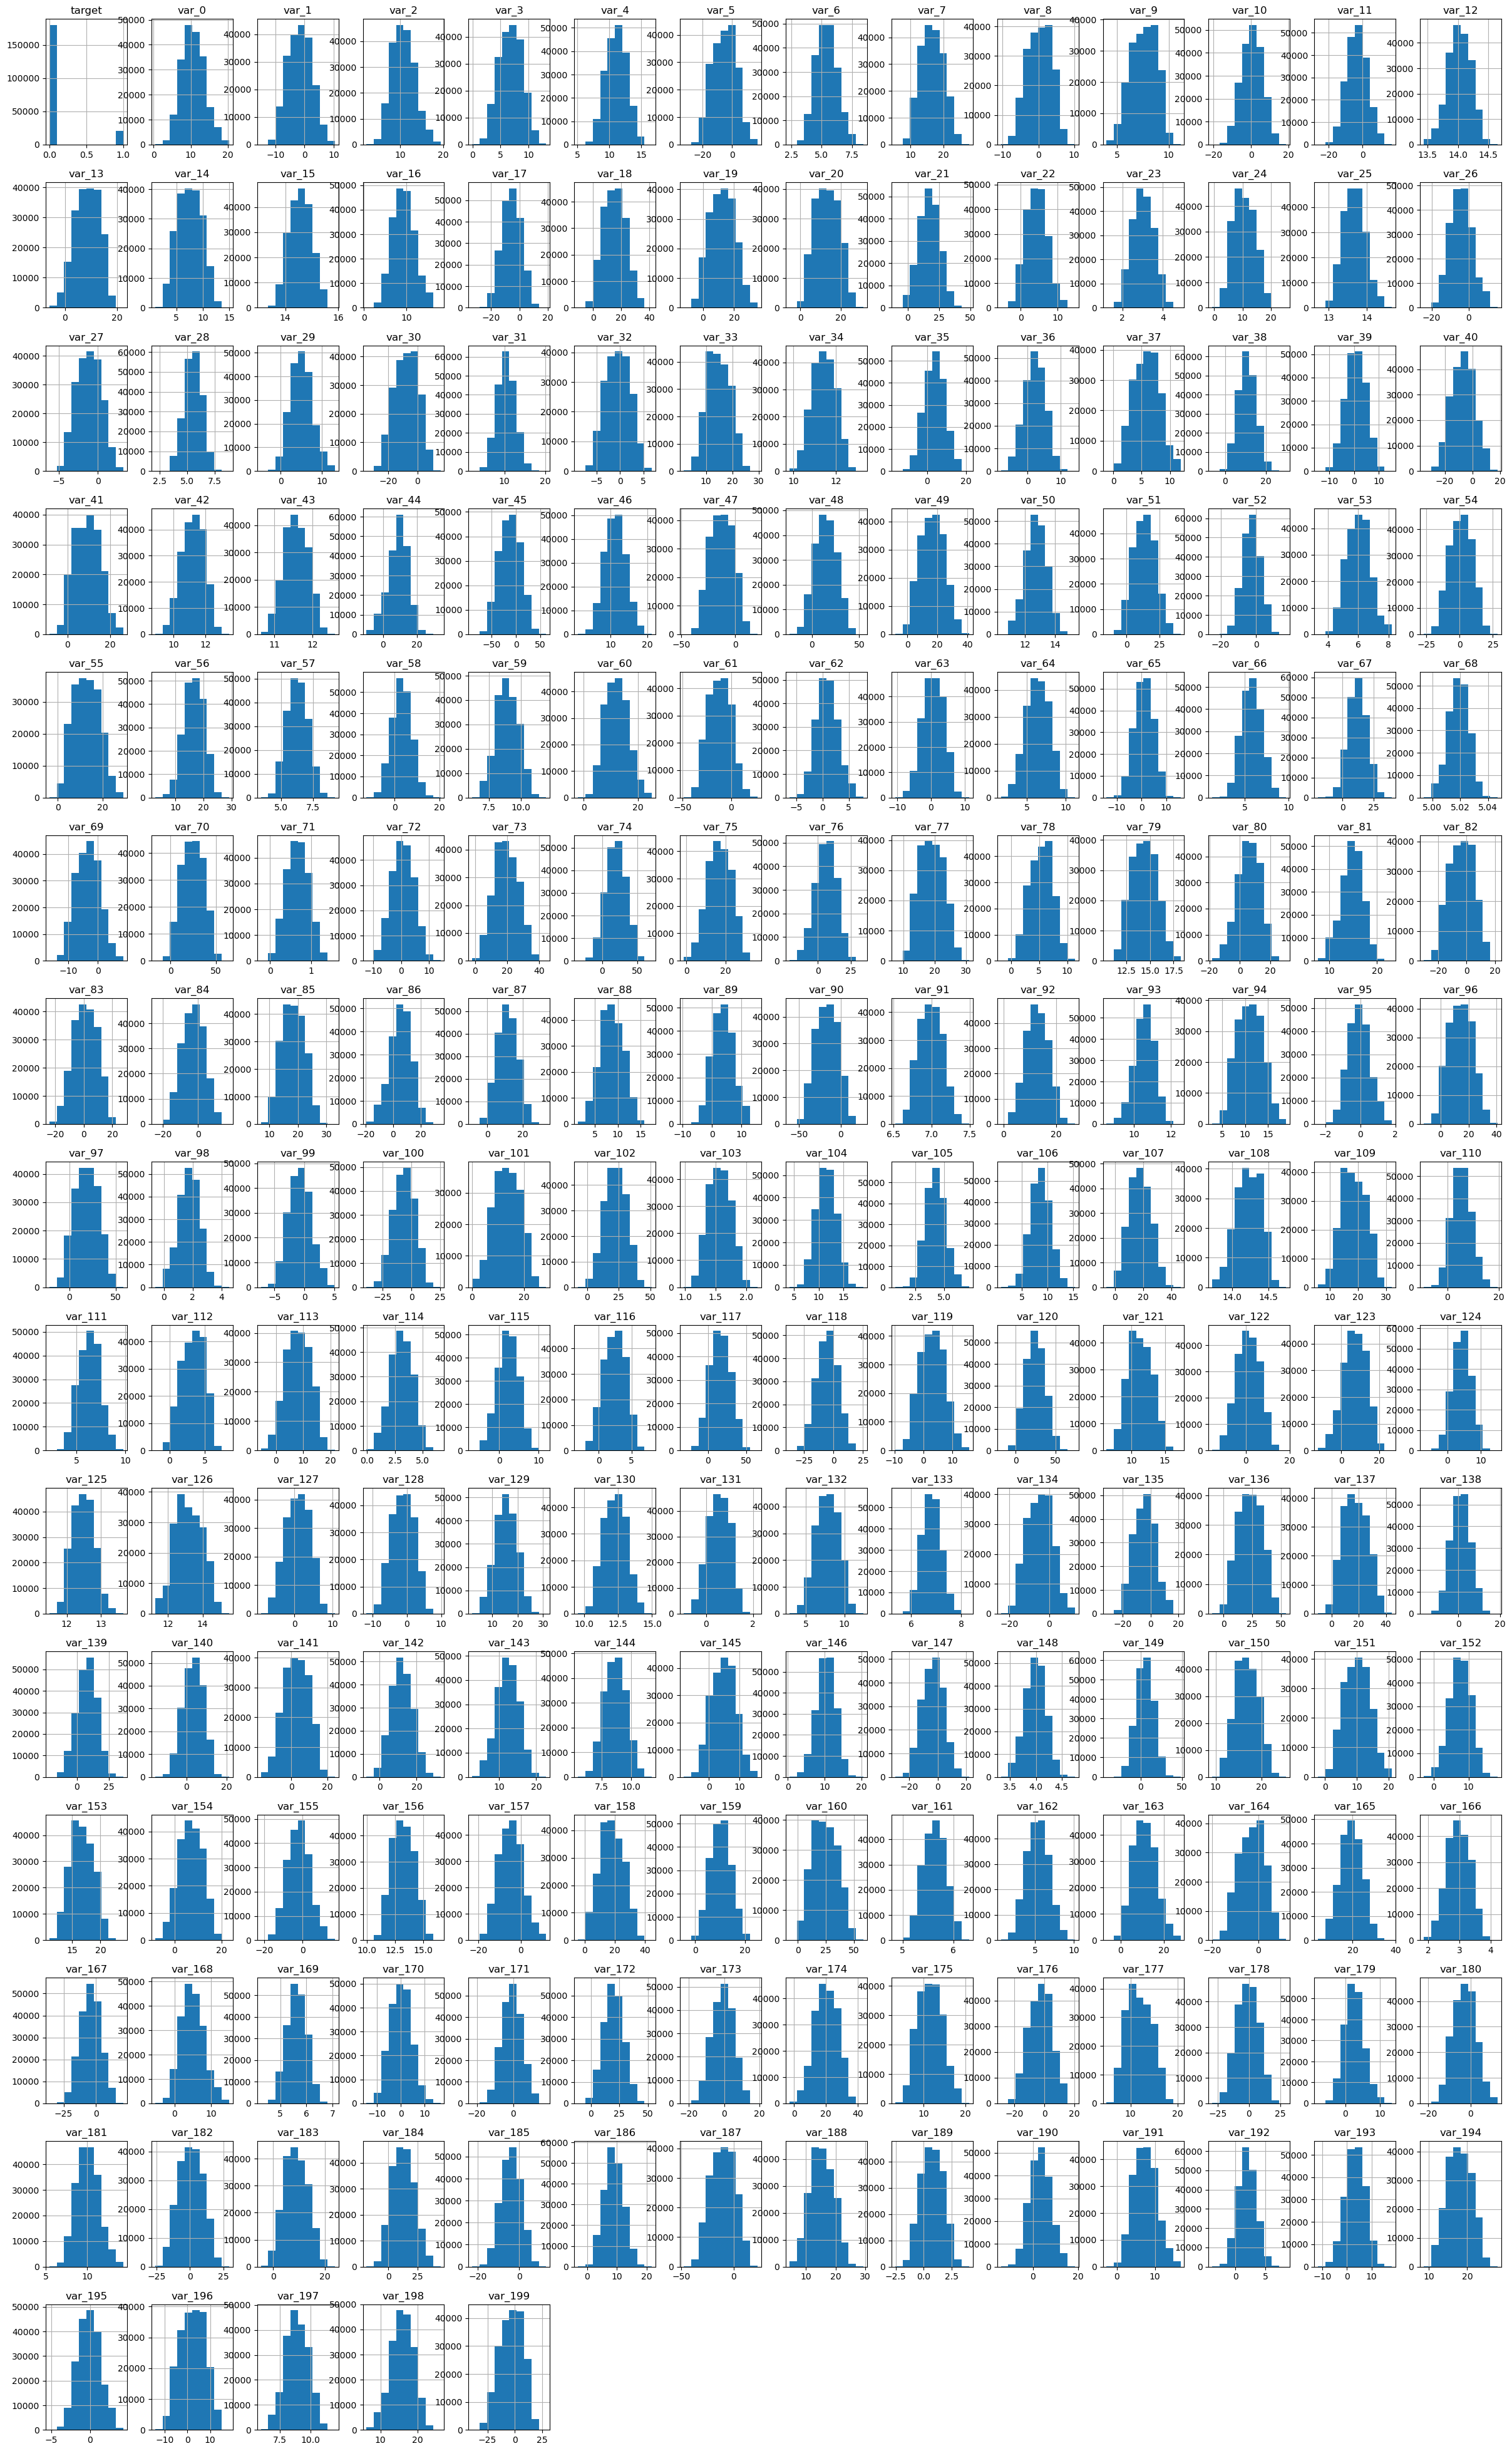

In [9]:
if PLOT_HIST==True:
    df.hist(figsize=(30,50))
    plt.show()

# Outliers

In [10]:
def identify_outliers(df, target_col):
    
    idx = []

    for col in df.columns: 
        if col == target_col: 
            std = df[col].std() 
            threshold = std * 3 
            idx_col = df[col][(df[col]>=abs(threshold)) | (df[col]<=-abs(threshold))].index.to_list() 
            idx.append(idx_col) 

    idx_flat = list(set([i for sublist in idx for i in sublist])) 
    return idx_flat


In [11]:
outliers_idx = identify_outliers(df, 'target') 
len(outliers_idx) 

20098


## Data preperation, data split and normalization

In [12]:
#(1) Drop the drop 'ID_code' column first
x = df.drop(['ID_code'], axis=1)
#from sklearn import preprocessing is used here
#(2) Normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


In [13]:
df_clean = pd.DataFrame(x_scaled)
df_clean.columns = df.drop(['ID_code'], axis=1).columns.values
df_clean.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.0,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.0,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.0,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.0,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041


In [14]:
#from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1)
for train_index, test_index in split.split(df_clean, df_clean["target"]):
    train_set = df_clean.loc[train_index]
    test_set = df_clean.loc[test_index]

In [15]:
Xtr = train_set.drop("target", axis=1)
ytr = train_set["target"].copy()
Xte = test_set.drop("target", axis=1)
yte = test_set["target"].copy()

In [16]:
Xtr.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.516125,0.527916,0.498937,0.516820,0.517733,0.551974,0.501814,0.501334,0.522649,0.501065,...,0.532444,0.522002,0.469995,0.502774,0.483334,0.537022,0.507576,0.488051,0.483913,0.527685
std,0.152719,0.159304,0.153241,0.154518,0.140015,0.157829,0.142132,0.152890,0.161280,0.171939,...,0.140091,0.155780,0.121038,0.132758,0.162950,0.150014,0.167811,0.152523,0.152271,0.154889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404424,0.405731,0.383361,0.400074,0.414630,0.428769,0.396646,0.384946,0.396794,0.369198,...,0.431357,0.404427,0.384999,0.411469,0.360441,0.429037,0.376608,0.379450,0.380712,0.410770
50%,0.508228,0.528709,0.490993,0.519020,0.520277,0.556761,0.497918,0.497290,0.527971,0.509923,...,0.531484,0.517366,0.467807,0.504933,0.481502,0.533916,0.510787,0.484602,0.486974,0.535407
75%,0.620508,0.645236,0.603422,0.632422,0.619880,0.672146,0.599243,0.615624,0.651093,0.642512,...,0.629843,0.628885,0.553700,0.598234,0.608193,0.639017,0.638544,0.601444,0.594844,0.648645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.951600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# check for missing values in the  dataframe in training
print(Xtr.isnull().sum())
if Xtr.isnull().sum().any():
    print("/nMissing data exist")
else:
    print("No missing data in dataset")

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64
No missing data in dataset


In [18]:
Xte.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.514728,0.526362,0.498049,0.516798,0.517376,0.552202,0.502439,0.499230,0.519454,0.499729,...,0.534015,0.521485,0.470364,0.502499,0.484765,0.535971,0.507859,0.487765,0.483772,0.525429
std,0.152683,0.159497,0.153035,0.153979,0.139542,0.158059,0.141385,0.153862,0.161789,0.172680,...,0.140753,0.155711,0.120802,0.132975,0.163429,0.149120,0.166362,0.153215,0.151793,0.155722
min,0.024369,0.048945,0.003029,0.016555,0.072116,0.037760,0.066832,0.017890,0.043719,0.030027,...,0.082203,0.029302,0.030425,0.064353,0.011074,0.011150,0.037463,0.045068,0.059313,0.022775
25%,0.401600,0.402608,0.381822,0.401376,0.414721,0.429394,0.398080,0.382035,0.391862,0.365726,...,0.431676,0.404412,0.385568,0.410560,0.361757,0.428854,0.379703,0.379893,0.380734,0.407554
50%,0.507877,0.526463,0.491088,0.518524,0.520265,0.555900,0.498385,0.495602,0.524730,0.506365,...,0.533159,0.516524,0.468413,0.504447,0.482290,0.531991,0.511491,0.485670,0.488324,0.530859
75%,0.619502,0.645198,0.602656,0.630877,0.618125,0.673248,0.599260,0.614727,0.648532,0.643348,...,0.631918,0.628241,0.553205,0.599406,0.610438,0.637226,0.636499,0.601787,0.594555,0.648770
max,0.965413,0.947011,0.941500,0.962460,0.910517,0.993741,0.914350,0.997632,0.973568,0.938316,...,0.988873,0.972939,1.000000,0.983270,0.964382,0.979305,0.980406,0.941819,0.980086,0.971506


In [19]:
# check for missing values in the  dataframe in testing
print(Xte.isnull().sum())
if Xte.isnull().sum().any():
    print("/nMissing data exist")
else:
    print("No missing data in dataset")

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64
No missing data in dataset


### Ancillary Functions

In [20]:
#Returns fomatted (hh:mm:ss) string from seconds
def formattedTimeSecs(sec):        
    hours, remainder = divmod(sec, 3600)
    minutes, seconds = divmod(remainder, 60)    
    return "%dh:%dm:%ds" % (hours, minutes, seconds)  
        
#Save the model
def save_model(model, filename, base_dir=BASE_MODEL_DIR): 
    os.makedirs(base_dir, exist_ok=True)
    file_path = os.path.join(base_dir, filename)
    pickle.dump(model, open(file_path, 'wb'))

In [21]:
#Load a saved model
def load_model(filename, base_dir=BASE_MODEL_DIR):
    model = None
    file_path = os.path.join(base_dir, filename)    
    exists = os.path.isfile(file_path)
    if exists:
        model = pickle.load(open(file_path, 'rb'))        
    return model

In [22]:
#Global variable to keep track of models to plot
_dict_roc_models = {}

In [23]:
#Adds a model to be plotted
def roc_models_add(model, label):
    global _dict_roc_models
    _dict_roc_models[label] = model

In [24]:
#Clears all stored models 
def roc_models_clear():
    global _dict_roc_models
    _dict_roc_models = {}

In [25]:
#Plots all the models 
def plot_models_roc(xPreProcess=None):
    label_roc = []
    auc_score_tr = []
    auc_score_te = []
    plt.figure(figsize=(8*2, 6))
    plt.subplot(121);    
    plt.title("ROC curves")
    plt.axis([0, 1, 0, 1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
#If there is a preprocessor setup for the features
    if (xPreProcess != None):
        local_Xtr = xPreProcess.transform(Xtr)
        local_Xte = xPreProcess.transform(Xte)
    else:
        local_Xtr = Xtr
        local_Xte = Xte

In [26]:
for key, value in _dict_roc_models.items():        
        model = value
        label_roc.append(key)
        
        #Plot for training   
        y_pred = model.predict_proba(local_Xtr)[:, 1]
        fpr, tpr, thresholds = roc_curve(ytr, y_pred)
        auc_score = roc_auc_score(ytr, y_pred)
        model_label = key + '-tr'
        plt.plot(fpr, tpr, linewidth=2, label=model_label)
        auc_score_tr.append(auc_score)
        
        #Plot for testing 
        y_pred = model.predict_proba(local_X_te)[:, 1]
        fpr, tpr, thresholds = roc_curve(yte, y_pred)
        auc_score = roc_auc_score(yte, y_pred)
        model_label = key + '-te' 
        plt.plot(fpr, tpr, linewidth=2, label=model_label)
        auc_score_te.append(auc_score)   
        plt.legend(loc="lower right", fontsize=8)
  #Plot of AUC Scores
        plt.subplot(122);   
        plt.xlabel('Models')
        plt.ylabel('AUC score')
        plt.title('AUC by model (tr, te)')
        plt.ylim([0, 1])
        plt.bar(np.arange(start=1, step=2, stop=len(label_roc)*2), height= auc_score_tr)
        plt.bar(np.arange(start=2, step=2, stop=len(label_roc)*2+1), height= auc_score_te)
        plt.xticks(np.arange(start=1, step=2, stop=len(label_roc)*2), label_roc, rotation=45)
 # Text on the top of each barplot
        x_tr_odd = np.arange(start=1, step=2, stop=len(label_roc)*2)
        x_te_even = np.arange(start=2, step=2, stop=len(label_roc)*2+1)
        for i in range(len(label_roc)):
            plt.text(x = xtr_odd[i] , y = auc_score_tr[i], s = "{0:.3f}".format(auc_score_tr[i]), size = 9)
            plt.text(x = xte_even[i] , y = auc_score_te[i], s = "{0:.3f}".format(auc_score_te[i]), size = 9)
        plt.show()
  

In [27]:
_time_start = time.time()
def start_timing():
    global _time_start
    _time_start = time.time()

def end_timing(label):
    print(label, formattedTimeSecs(time.time() - _time_start))
    
class FeatureSelector():
    def __init__(self, indices= None):
        self.indices = indices
        
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        return X.iloc[:, self.indices]
    
roc_models_clear()

## Principal Component Analysis
The objective is to analyze the information variance distribution among the feature

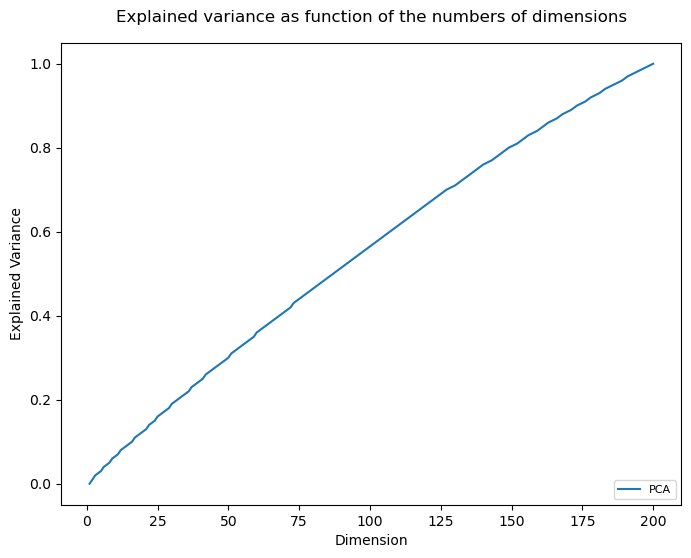

In [28]:
#Apply PCA
#from sklearn.decomposition import PCA

#Apply PCA
pca=PCA(random_state=42)
pca.fit(Xtr)


#Analyze results
var_ratio_sum = np.cumsum(pca.explained_variance_ratio_)
threshold = np.arange(0.0, 1.01, 0.01, )
dimension = lambda threshold: np.argmax(var_ratio_sum>=threshold) + 1

#Plot
plt.figure(figsize=(8, 6))
plt.plot([dimension(x) for x in threshold],threshold, label = 'PCA')
plt.title('Explained variance as function of the numbers of dimensions', pad=15)
plt.ylabel('Explained Variance')
plt.xlabel('Dimension')
plt.legend(loc="lower right", fontsize=8)
plt.show()

In [29]:
X_combined = pd.concat([Xtr, Xte], axis=0)
pca.fit(X_combined)

PCA(random_state=42)

# Baseline classifier

In [30]:
#Controls execution
#RUN_KNEIGHBORS_CLASSIFIER = False
RUN_KNEIGHBORS_CLASSIFIER = True

RUN_LOGISTIC_REGRESSOR = False
#RUN_LOGISTIC_REGRESSOR = True

#RUN_SDG_CLASSIFIER = False
RUN_SDG_CLASSIFIER = True

## Measure the accuracy of KNeighborsClassifier

In [31]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the KNeighborsClassifier on the training data
knn.fit(Xtr, ytr)

# Predict the classes of the test set using the KNeighborsClassifier
knn_y_pred = knn.predict(Xte)

# Evaluate the performance of the KNeighborsClassifier using various evaluation metrics
cm = confusion_matrix(yte, knn_y_pred)
accuracy = accuracy_score(yte, knn_y_pred)
precision = precision_score(yte, knn_y_pred, average='weighted')
recall = recall_score(yte, knn_y_pred, average='weighted')
f1 = f1_score(yte, knn_y_pred, average='weighted')

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[17986     4]
 [ 2008     2]]
Accuracy: 89.94%
Precision: 84.27%
Recall: 89.94%
F1 Score: 85.21%


## Measure the accuracy of logisticRegression

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
logisticRegression = LogisticRegression(random_state=42, solver='liblinear') 
logisticRegression.fit(Xtr, ytr)
# Assuming you have logisticRegression, X_te, and y_te defined
LR_y_pred = logisticRegression.predict(Xte)

#Confusion Matrix
cm = confusion_matrix(yte, LR_y_pred)

#Accuracy
accuracy = accuracy_score(yte, LR_y_pred)

#Precision: measures the proportion of true positive predictions out of all positive predictions made by the model.
precision = precision_score(yte, LR_y_pred)

#Recall: measures the proportion of true positive predictions out of all actual positive instances.
recall = recall_score(yte, LR_y_pred)

#F1 Score: is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance.
f1 = f1_score(yte, LR_y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[17791   199]
 [ 1457   553]]
Accuracy: 91.72%
Precision: 73.54%
Recall: 27.51%
F1 Score: 40.04%


## Measure the accuracy of SGDClassifier

In [33]:
# Assuming you have logisticRegression, X_te, and y_te defined
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have an instance of SGDClassifier 
sgd_clf = SGDClassifier(loss="hinge", random_state=42) 

# Assuming you have your test data 
sgd_clf.fit(Xtr, ytr)  # Train the model first

sgd_clf_y_pred = sgd_clf.predict(Xte)


#Confusion Matrix
cm = confusion_matrix(yte, sgd_clf_y_pred)

#Accuracy
accuracy = accuracy_score(yte, sgd_clf_y_pred)

#Precision: measures the proportion of true positive predictions out of all positive predictions made by the model.
precision = precision_score(yte, sgd_clf_y_pred)

#Recall: measures the proportion of true positive predictions out of all actual positive instances.
recall = recall_score(yte, sgd_clf_y_pred)

#F1 Score: is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance.
f1 = f1_score(yte, sgd_clf_y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[17986     4]
 [ 1958    52]]
Accuracy: 90.19%
Precision: 92.86%
Recall: 2.59%
F1 Score: 5.03%


In [34]:
RUN_RANDOM_FOREST_CLASSIFIER=True
RUN_GRADIENT_BOOSTING_CLASSIFIER=True
RUN_ADA_BOOST_CLASSIFIER=True

## Measure the accuracy of RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have training and testing data defined
#X_train, X_test, y_train, y_test = ...  # Your data loading logic here

# Create and train the Random Forest model
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(Xtr, ytr)

# Make predictions on the test set
rfc_y_pred = randomForestClassifier.predict(Xte)

# Calculate evaluation metrics
cm = confusion_matrix(yte, rfc_y_pred)
accuracy = accuracy_score(yte, rfc_y_pred)
precision = precision_score(yte, rfc_y_pred)
recall = recall_score(yte, rfc_y_pred)
f1 = f1_score(yte, rfc_y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[17990     0]
 [ 2010     0]]
Accuracy: 89.95%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
print("X_train shape:", Xtr.shape)  # Check data shapes
print("y_train shape:", ytr.shape)
print("Trained model:", randomForestClassifier) 

X_train shape: (180000, 200)
y_train shape: (180000,)
Trained model: RandomForestClassifier()


## Measure the accuracy of GradientBoostingClassifier

In [59]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have X_test and y_test defined (replace with your data loading logic)

# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier()  # You can adjust parameters here
#gbc.fit(Xtr, ytr)
# Assuming you have already trained the model (replace with your training logic)
gbc.fit(Xtr, ytr)  # Train the model on your training data

# Make predictions on the test set
GBC_y_pred = gbc.predict(Xte)

# Calculate evaluation metrics
cm = confusion_matrix(yte, GBC_y_pred)
accuracy = accuracy_score(yte, GBC_y_pred)
precision = precision_score(yte, GBC_y_pred)
recall = recall_score(yte, GBC_y_pred)
f1 = f1_score(yte, GBC_y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[17980    10]
 [ 1955    55]]
Accuracy: 90.18%
Precision: 84.62%
Recall: 2.74%
F1 Score: 5.30%


## Measure the accuracy of AdaBoostClassifier

In [38]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    ada_clf = AdaBoostClassifier(n_estimators=100, random_state=RANDOM_SEED)
    ada_clf.fit(Xtr, ytr)


In [40]:

# Assuming you have X_train, y_train, and X_test defined (replace with your data loading logic)
# Create an AdaBoostClassifier object
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=RANDOM_SEED)
# Train the model on your training data (replace with your training logic)
ada_clf.fit(Xtr, ytr)
# Make predictions on the test data
ada_y_pred = ada_clf.predict(Xte)  # Use the trained model 'ada_clf'
# Calculate evaluation metrics
accuracy = accuracy_score(yte, ada_y_pred)  # Use 'y_test' for actual labels
precision = precision_score(yte, ada_y_pred)
recall = recall_score(yte, ada_y_pred)
f1 = f1_score(yte, ada_y_pred)
conf_matrix = confusion_matrix(yte, ada_y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))



C:\Users\asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
 [[17727   263]
 [ 1424   586]]
Accuracy: 91.56%
Precision: 69.02%
Recall: 29.15%
F1 Score: 40.99%


## Feature Selection

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Assuming you have X_train, y_train defined (replace with your data loading logic)

# Create an ExtraTreesClassifier object
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42) 

# Fit the model on your training data
extra_trees_clf.fit(Xtr, ytr)

# Calculate feature importances
importances = extra_trees_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in extra_trees_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(Xtr.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 81 (0.008747)
2. feature 12 (0.007511)
3. feature 139 (0.007252)
4. feature 110 (0.006882)
5. feature 53 (0.006882)
6. feature 26 (0.006744)
7. feature 146 (0.006559)
8. feature 174 (0.006556)
9. feature 166 (0.006506)
10. feature 6 (0.006420)
11. feature 22 (0.006403)
12. feature 76 (0.006378)
13. feature 80 (0.006330)
14. feature 198 (0.006262)
15. feature 99 (0.006208)
16. feature 2 (0.006136)
17. feature 179 (0.006087)
18. feature 109 (0.006077)
19. feature 0 (0.006043)
20. feature 133 (0.006013)
21. feature 148 (0.005964)
22. feature 13 (0.005962)
23. feature 44 (0.005957)
24. feature 165 (0.005911)
25. feature 21 (0.005868)
26. feature 190 (0.005860)
27. feature 170 (0.005710)
28. feature 40 (0.005707)
29. feature 1 (0.005668)
30. feature 191 (0.005646)
31. feature 78 (0.005639)
32. feature 34 (0.005601)
33. feature 94 (0.005580)
34. feature 154 (0.005572)
35. feature 108 (0.005549)
36. feature 115 (0.005536)
37. feature 164 (0.005535)
38. feature 184 

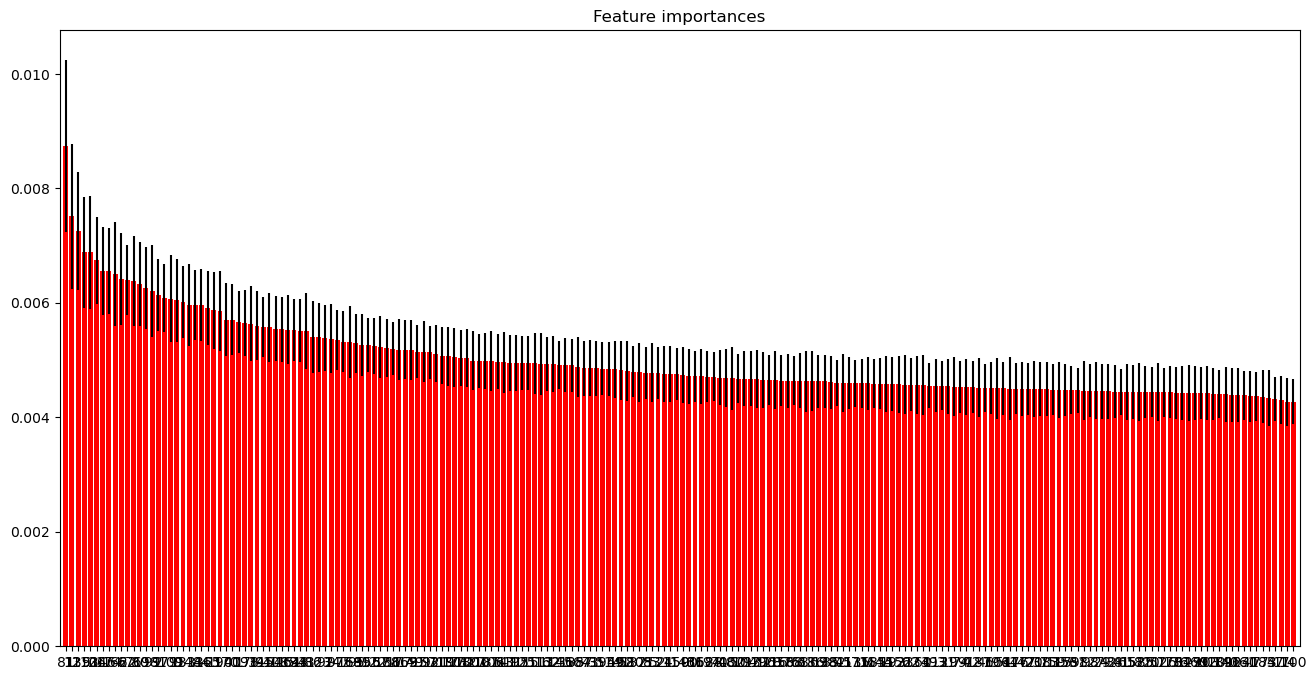

In [43]:
# Plot the feature importances of the forest
plt.figure(figsize=(16, 8))
plt.title("Feature importances")
plt.bar(range(Xtr.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtr.shape[1]), indices)
plt.xlim([-1, Xtr.shape[1]])
plt.show()

In [44]:
#Filter by the 50 most important features
SELECTED_NUM_FEATURES=50
featureSelector = FeatureSelector(indices[:SELECTED_NUM_FEATURES]) 
Xtr_filtered= featureSelector.transform(Xtr)

In [45]:
#Train random forest classifier
start_timing()
randomForestClassifier = RandomForestClassifier(n_estimators=200,random_state=RANDOM_SEED, n_jobs = -1)
randomForestClassifier.fit(Xtr_filtered, ytr)
end_timing("RandomForest Classifier Reduced Training")

#Plot the AUC
roc_models_add(randomForestClassifier, 'RandomForestClfReduced')
plot_models_roc(featureSelector)

#Save the model
#save_model(randomForestClassifier, 'dfltRandomForestClf')

RandomForest Classifier Reduced Training 0h:1m:28s


## Dimensionality Reduction Visualization

In [46]:
#Supporting libraries
#import time
#import random
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.patheffects as PathEffects
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from sklearn.manifold import LocallyLinearEmbedding
#from sklearn.manifold import MDS
#Constant/s
NUM_COMPONENTS=2
NUM_SUB_SAMPLES=1000

#Ancillary function to do a 2-d visualize the outputs of dimensionallyty reduction models
#The num_sub_samples specifies the number of sub-samples to take from the input 
def visualize(x, y, num_sub_samples):
    #Choose a color palette with seaborn (https://seaborn.pydata.org/generated/seaborn.color_palette.html)
    num_classes = len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_classes))

    #Create a scatter plot
    figure = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    
    #Draw a random sub-sample and plot 
    idx = np.random.choice(len(y), num_sub_samples, replace=False)
    x0_sub_sampled = np.take(x[:,0], idx)
    x1_sub_sampled = np.take(x[:,1], idx)
    y_sub_sampled = np.take(y, idx)

    sc = ax.scatter(x0_sub_sampled, x1_sub_sampled, lw=0, s=40, c=palette[y_sub_sampled.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    #Add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):
        #Position of each label at median of data points
        xtext, ytext = np.median(x[y == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24,  color= palette[i], fontweight='bold')
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    return figure, ax, sc, txts

In [47]:
#Reduce dinension by tSNE (2 component) on test set (tried on test set and took too long)
start_time = time.time()
tSNE = TSNE(n_components = NUM_COMPONENTS, random_state=RANDOM_SEED)
tSNE_reduced = tSNE.fit_transform(Xtr)
#Log the ellapsed time
print("tSNE 2 components:",  time.time()-start_time,'seconds')

tSNE 2 components: 4020.259190559387 seconds


C:\Users\asus\AppData\Local\Temp\ipykernel_16712\1223978038.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('viridis', int(np.max(y) + 1))


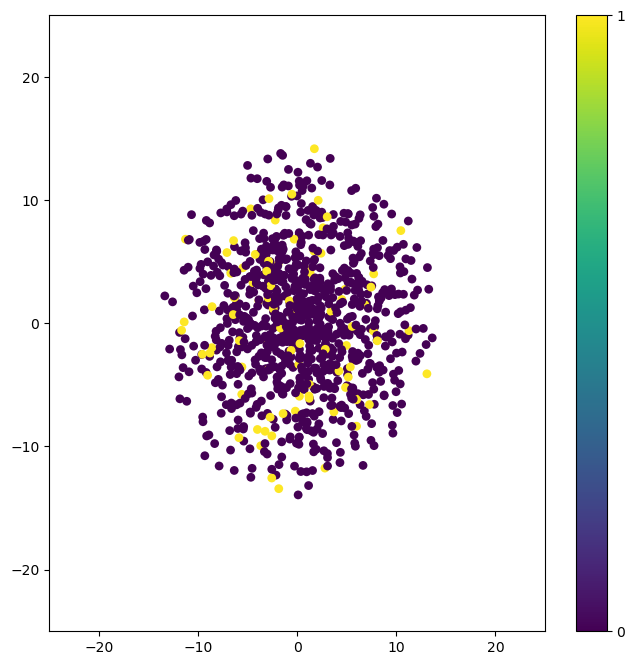

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def visualize(x, y, num_sub_samples):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Ensure num_sub_samples is an integer
    num_sub_samples = int(num_sub_samples)
    
    # Randomly select indices for subsampling
    idx = np.random.choice(len(x), num_sub_samples, replace=False)
    
    # Subsample the data
    x0_sub_sampled = np.take(x[:, 0], idx)
    x1_sub_sampled = np.take(x[:, 1], idx)
    y_sub_sampled = np.take(y, idx)
    
    # Create a color palette
    palette = plt.cm.get_cmap('viridis', int(np.max(y) + 1))
    
    # Ensure y_sub_sampled is cast to integers
    sc = ax.scatter(x0_sub_sampled, x1_sub_sampled, lw=0, s=40, c=palette(y_sub_sampled.astype(int)))
    
    # Plot settings
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.colorbar(sc, ax=ax, ticks=range(int(np.max(y)) + 1))
    plt.show()
visualize(tSNE_reduced, ytr.values,  NUM_SUB_SAMPLES)

In [50]:
#Reduce dinension by PCA (2 component) 
start_time = time.time()
pca_2components = PCA(n_components = NUM_COMPONENTS, random_state=RANDOM_SEED)
pca_reduced = pca_2components.fit_transform(Xtr)
#Log the ellapsed time
print("PCA 2 components:",  time.time()-start_time,'seconds') 

PCA 2 components: 0.2628517150878906 seconds


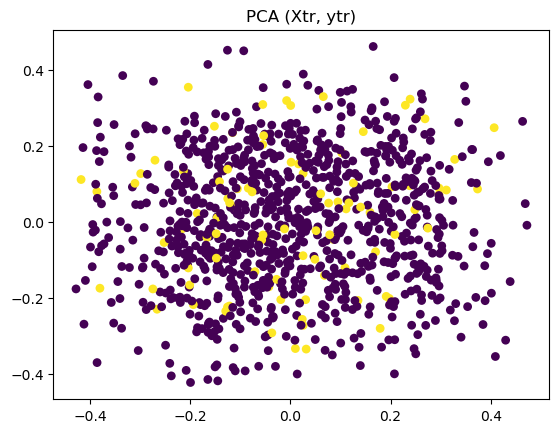

In [68]:
def visualize(data_reduced, ytr_values, num_sub_samples=None, title="t-SNE (Xtr, ytr)"):
#Visualizes a dimensionality-reduced embedding using a scatter plot.

  if num_sub_samples is not None:
    # Subsample data for visualization
    idx = np.random.choice(len(data_reduced), size=num_sub_samples, replace=False)
    x0_sub_sampled = data_reduced[idx, 0]
    x1_sub_sampled = data_reduced[idx, 1]
    y_sub_sampled = ytr_values[idx]
  else:
    # Visualize all data points
    x0_sub_sampled = data_reduced[:, 0]
    #x1_sub_sampled = data_reduced[:, 1]
    y_sub_sampled = ytr_values

  # Create scatter plot
  plt.scatter(x0_sub_sampled, x1_sub_sampled, lw=0, s=40, c=y_sub_sampled.astype(int))
  plt.title(title)
  plt.show()
# Visualize PCA results
visualize(pca_reduced, ytr.values, NUM_SUB_SAMPLES, title="PCA (Xtr, ytr)")

In [52]:
#Reduce dinension by LLE (2 component) on test set
start_time = time.time()
lle = LocallyLinearEmbedding(n_components=NUM_COMPONENTS, random_state=RANDOM_SEED)
lle_reduced = lle.fit_transform(Xte)
#Log the ellapsed time
print("LLE 2 components:",  time.time()-start_time,'seconds')

LLE 2 components: 450.97858214378357 seconds


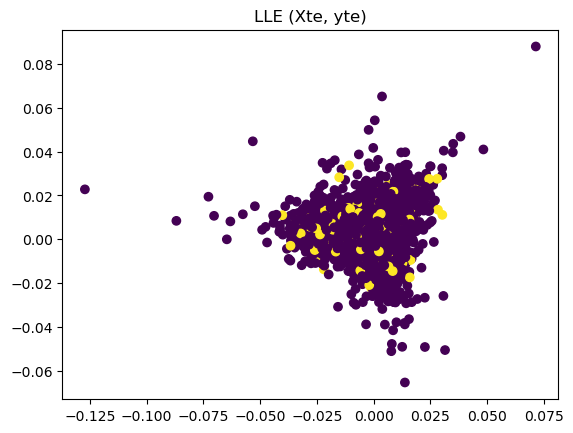

In [65]:
import matplotlib.pyplot as plt

# Assuming lle_reduced, yte and NUM_SUB_SAMPLES are defined elsewhere
plt.scatter(lle_reduced[:, 0], lle_reduced[:, 1], c=yte.values)
plt.title("LLE (Xte, yte)")
plt.show()

### Save the Visualization models

In [66]:
#Save the models
save_model(tSNE, 'tSNE')
save_model(lle, 'lle')
save_model(pca_2components, 'pca_2components')

In [68]:
# challanges faced
#1. Data Sparsity: Insufficient historical data for new customers or infrequent transactions can hinder prediction accuracy.
#2. Data Imbalance: Datasets often have an imbalanced distribution of transaction types, making it challenging to predict less frequent but crucial transactions.